In [ ]:
import sys
!{sys.executable} -m pip install statsmodels

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from patsy import dmatrices

In [82]:
df = pd.read_csv("data/Guerry.csv")
df.isnull().sum()


Unnamed: 0         0
dept               0
Region             1
Department         0
Crime_pers         0
Crime_prop         0
Literacy           0
Donations          0
Infants            0
Suicides           0
MainCity           0
Wealth             0
Commerce           0
Clergy             0
Crime_parents      0
Infanticide        0
Donation_clergy    0
Lottery            0
Desertion          0
Instruction        0
Prostitutes        0
Distance           0
Area               0
Pop1831            0
dtype: int64

In [83]:
df = df.dropna()
df.head()

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [84]:
columns_interest = ["Department", "Lottery", "Literacy", "Wealth", "Region"]
df = df[columns_interest]
df.describe().style.format("{:,.2f}") #  Does not show Department and Region, because categorical values / Strings.

,Lottery,Literacy,Wealth
count,85.00,85.00,85.00
mean,43.04,39.14,43.58
std,24.74,17.43,25.11
min,1.00,12.00,1.00
25%,22.00,25.00,22.00
50%,43.00,38.00,44.00
75%,64.00,52.00,65.00
max,86.00,74.00,86.00


Want to know whether literacy rates (Literacy column) in the 85 French departments (Departments) are associated with per capita wagers on the Royal Lottery (Lottery) in the 1820s. We need to control for the level of wealth (Wealth) in each department, and we also want to include a series of dummy variables on the right-hand side of our regression equation to control for unobserved heterogeneity due to regional effects (Region). The model is estimated using ordinary least squares regression (OLS).

Create matrix Y of endogenous variables (dependent, response, regressand, etc.), here it is only one endogenous variable, vector y. And create a matrix X of exogenous variable(s) (independent, predictor, regressor, etc.).

In [85]:
y, X = dmatrices("Lottery ~ Literacy + Wealth + Region", data=df, return_type="dataframe")
y, X # X: Region was automatically one-hot encoded (dummy variables, indicator variables). And constant intercept was added. 

(    Lottery
 0      41.0
 1      38.0
 2      66.0
 3      80.0
 4      79.0
 ..      ...
 80     68.0
 81     40.0
 82     55.0
 83     14.0
 84     51.0
 
 [85 rows x 1 columns],
     Intercept  Region[T.E]  Region[T.N]  Region[T.S]  Region[T.W]  Literacy  \
 0         1.0          1.0          0.0          0.0          0.0      37.0   
 1         1.0          0.0          1.0          0.0          0.0      51.0   
 2         1.0          0.0          0.0          0.0          0.0      13.0   
 3         1.0          1.0          0.0          0.0          0.0      46.0   
 4         1.0          1.0          0.0          0.0          0.0      69.0   
 ..        ...          ...          ...          ...          ...       ...   
 80        1.0          0.0          0.0          0.0          1.0      28.0   
 81        1.0          0.0          0.0          0.0          1.0      25.0   
 82        1.0          0.0          0.0          0.0          0.0      13.0   
 83        1.0    

In [86]:
model = sm.OLS(y, X) # Describes model.
result = model.fit() # Fits model.
print("Parameter estimates:\n", result.params)
print("R-squared:", result.rsquared)

Parameter estimates:
 Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64
R-squared: 0.337950869192882


In [87]:
print("List of all attributes of res:\n", dir(result))

List of all attributes of res:
 ['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', '

In [88]:
result.summary() # Summarizes model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.07e-05
Time:                        11:36:37   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- <b>R-squared</b>, 0.338: Model explains 33.8% of variance of dependent variable y (Lottery) by independent variables $x_1, ..., x_6$ (Region[T.E], ..., Wealth).
- Look at <b>Adj. R-squared</b> rather than R-squared, 0.287: R-squared will always increase when more independent variables are added. In contrast, adj. R-squared calculates R-squared only from variables that are statistically significant.
- <b>Prob (F-statistic)</b>, 1.07e-05: null hypothesis, all coefficients are equal to zero: $H_0: \beta_1 = \cdots = \beta_6 = 0 \quad$ and $H_A: H_0 \text{ not true}.$ p-value is < e.g. 0.05, thus reject null hypothesis, so there is statistically significant evidence that there is a relationship between dependent and independent variables together in the model (F-statistic answers if all variables together in the model lead to a relationship, not if 1, 2 or ... of the independent variables together lead to a relationship). If this null hypothesis cannot be rejected, then the model cannot be used as it is (even if all p-values of the variables were 0).
- <b>AIC</b>, 764.6: AIC is used to determine which of multiple models is most likely to be the best model for a given dataset. AIC score is only useful in comparison with other AIC scores for same dataset. A lower AIC score is better.
- <b>BIC</b>, 781.7: BIC is used to determine which of multiple models is most likely to be the best model for a given dataset. BIC score is only useful in comparison with other BIC scores for same dataset. A lower BIC score is better.
- <b>Df Model</b>, 6: Number of independent variables in model.

- <b>Intercept and coef</b>, 38.6517: if all independent variables are 0, dependent variable Lottery is predicted to be 38.6517.
- <b>Region[T.E] and coef</b>, -15.4278: if independent variable Region[T.E] increases by 1, dependent variable Lottery is predicted to decrease by -15.4278.
<br><b>but</b><br>
- <b>P>|t|</b>, for each variable: null hypothesis, the coefficient is equal to zero, e.g., for Region[T.E]:  $H_0: \beta_{Region[T.E]} = 0 \quad$ and $H_A: H_0 \text{ not true}.$ p-value is > e.g. 0.05, thus do not reject null hypothesis, so there is no evidence that there is a relationship between dependent y and independent Region[T.E] variable in the model at a 5% significance level, but at a 12% significance level. What is the result of this now?<br>
Some recommend removing the insignificant variables from the model (p-value > 0.05 or 0.1), but this should not be done.
The model should be used as it is. Because
    - <b>"If you are only interested in predicting if a customer will buy (spend money on the lottery), then statistcal hypothesis tests really are not your main concern. Instead, you should be externally validating your model via a validation/test prodecedure on unseen data.</b>
    - If, instead, you are interested in examining which factors contribute to the probability of a customer buying, then there is no need to remove variables which fail to reject the null. Presumably, you included a variable in your model because you thought (from past experience or expert opinion) that it played an important part in a customer deciding if they will buy. That the variable failed to reject the null does not make your model a bad one, it just means that your sample did not detect an effect of that variable. That is perfectly ok."
    - But, removing variables that are potentially expensive to observe in the future when using the model for predictionn is okay.

- <b>Skew</b>(ness) measures symmetry - here of dependent variable y. Normal distribution has skewness of 0.<br>
![Skew](images/skewness.png "Skew")
- <b>Kurtosis</b> measures whether data - here dependent variable - are heavy-tailed (> 3, longer tails) or light-tailed (< 3, shorter tails) relative to a normal distribution. Normal distribution has kurtosis of 3.<br>
![Kurtosis](images/kurtosis.png "Kurtosis")<br>
Thus, values ​​of the dependent variable are not perfectly normally distributed, because skew(ness) -0.340 and kurtosis 2.454. So what? Does not matter for OLS regression whether dependent variable is normally or not normally distributed (the errors should be normally distributed).
<br>
But we cannot know the error, because the error is the deviation of the observed value from the unobservable, true value of a quantity of interest (e.g., population mean - which we do not know, because we do not know entire population). So we assume residual is close to error; residual is the difference between the observed value and the estimated value of the quantity of interest (e.g., sample mean).
<br>
- <b>Jarque-Bera (JB)</b> tests whether the residuals are normally distributed or not. Value close to 0: normally distributed.
- <b>Prob(JB)</b> tests whether the residuals are normally distributed or not. Value close to 1: normally distributed.
- <b>Omnibus</b> tests whether the residuals are normally distributed or not. Value close to 0: normally distributed.
- <b>Prob(Omnibus)</b> tests whether the residuals are normally distributed or not. Value close to 1: normally distributed.
<br> Thus, the residuals are not normally distributed. So what? "Violating the normality assumption is relatively unproblematic."
- <b>Durbin-Watson</b> tests for auto-correlation in a time-series.
<br><br>
Conclusion: Model is okay, better than random guessing, but non-linear model might be better than this linear model.


<AxesSubplot:ylabel='Density'>

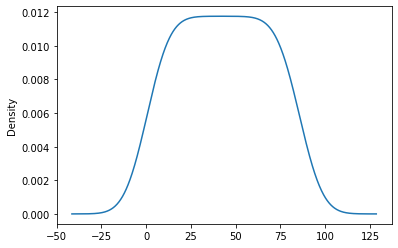

In [89]:
df["Lottery"].plot.kde()

In [90]:
print(sm.stats.linear_rainbow(result)) # Null hypothesis: relationship is properly modelled as linear.
print(sm.stats.linear_rainbow.__doc__) # Doc informs: first number is F-statistic and second is p-value.

# p-value is > alpha (e.g., 0.05), thus do not reject null hypothesis.

(0.8472339976156913, 0.6997965543621643)

    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        

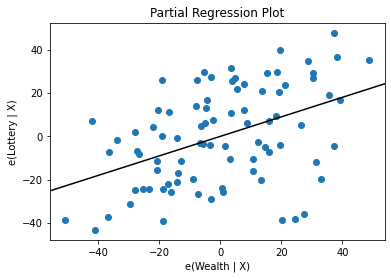

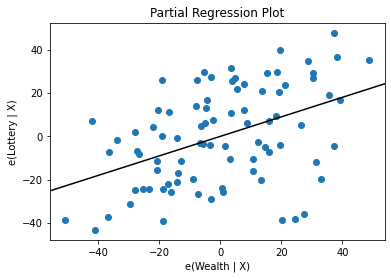

In [91]:
# "Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to
# discern relationships. Instead, we want to look at the relationship of the dependent variable and
# independent variables conditional on the other independent variables:" P(...| other independent variables).

# If obs_labels is True, then the points are annotated with their observation label (row names of df,
# here 0, 1, 2, ..., 84).
sm.graphics.plot_partregress("Lottery", "Wealth", ["Region", "Literacy"], data=df, obs_labels=False)

In [92]:
# Using formula API as smf.
model = smf.ols(formula="Lottery ~ Literacy + Wealth + Region", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.07e-05
Time:                        11:36:39   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# Region is a categorical variable (String) and was automatically one-hot encoded. On the other
# hand, if Region were a categorical integer variable, C(...) would have to be written around Region
# so that the model knows that Region should be treated as categorical.
model = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region)", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.07e-05
Time:                        11:36:40   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6517      9.456      4.087      0.000      19.826      57.478
C(Region)[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
C(Region)[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
C(Region)[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
C(Region)[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy          -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth             0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Minus - removes a variable, and -1 removes intercept.
model = smf.ols(formula="Lottery ~ Literacy + Wealth + Region -1", data=df)
result = model.fit()
result.summary() #  When variable with name intercept is removed, Region[C] will be intercept.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.07e-05
Time:                        11:36:40   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Region[C]     38.6517      9.456      4.087      0.000      19.826      57.478
Region[E]     23.2239     14.931      1.555      0.124      -6.501      52.949
Region[N]     28.6347     13.127      2.181      0.032       2.501      54.769
Region[S]     34.1034     10.370      3.289      0.002      13.459      54.748
Region[W]     28.5604     10.018      2.851      0.006       8.616      48.505
Literacy      -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth         0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# ":" adds product of column_name1 : column_name2, and removes individual columns column_name1 and column_name2.
model = smf.ols(formula="Lottery ~ Wealth : Literacy + Region", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     4.700
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           0.000827
Time:                        11:36:40   Log-Likelihood:                -381.76
No. Observations:                  85   AIC:                             775.5
Df Residuals:                      79   BIC:                             790.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          47.8130      5.909      8.092      0.000      36.051      59.575
Region[T.E]       -31.8424      8.850     -3.598      0.001     -49.459     -14.226
Region[T.N]       -27.6259      7.707     -3.584      0.001     -42.967     -12.285
Region[T.S]        -8.8565      7.752     -1.143      0.257     -24.285       6.573
Region[T.W]       -11.0910      7.734     -1.434      0.156     -26.486       4.304
Wealth:Literacy     0.0070      0.002      2.989      0.004       0.002       0.012
==============================================================================
Omnibus:                        8.998   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.891
Skew:                          -0.251   Prob(JB):                        0.143
Kurtosis:                       2.079   Cond. No.                     1.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# "*" adds product of column_name1 * column_name2, and includes individual columns column_name1 and column_name2.
model = smf.ols(formula="Lottery ~ Wealth * Literacy + Region", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5.615
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           2.96e-05
Time:                        11:36:40   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             766.6
Df Residuals:                      77   BIC:                             786.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          39.0993     17.470      2.238      0.028       4.312      73.887
Region[T.E]       -15.4451      9.807     -1.575      0.119     -34.973       4.082
Region[T.N]        -9.9728      9.432     -1.057      0.294     -28.753       8.808
Region[T.S]        -4.5754      7.380     -0.620      0.537     -19.270      10.119
Region[T.W]       -10.1122      7.275     -1.390      0.169     -24.598       4.374
Wealth              0.4432      0.290      1.530      0.130      -0.133       1.020
Literacy           -0.1960      0.396     -0.495      0.622      -0.984       0.592
Wealth:Literacy     0.0002      0.007      0.031      0.976      -0.013       0.013
==============================================================================
Omnibus:                        3.076   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.709
Skew:                          -0.341   Prob(JB):                        0.258
Kurtosis:                       2.452   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# Apply functions to variables, e.g., np.log().
model = smf.ols(formula="Lottery ~ Wealth + np.log(Literacy) + Region", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     6.659
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.02e-05
Time:                        11:36:40   Log-Likelihood:                -375.25
No. Observations:                  85   AIC:                             764.5
Df Residuals:                      78   BIC:                             781.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           55.7337     25.338      2.200      0.031       5.290     106.178
Region[T.E]        -15.2922      9.583     -1.596      0.115     -34.371       3.787
Region[T.N]         -9.7758      9.237     -1.058      0.293     -28.165       8.613
Region[T.S]         -3.8003      7.438     -0.511      0.611     -18.608      11.007
Region[T.W]         -9.6733      7.233     -1.337      0.185     -24.072       4.726
Wealth               0.4442      0.104      4.252      0.000       0.236       0.652
np.log(Literacy)    -6.8416      7.306     -0.936      0.352     -21.386       7.703
==============================================================================
Omnibus:                        3.189   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.690
Skew:                          -0.325   Prob(JB):                        0.261
Kurtosis:                       2.420   Cond. No.                         606.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Apply custom-functions to variables.
def log_plus_1(x):
    return np.log(x) + 1.0

model = smf.ols(formula="Lottery ~ Wealth + log_plus_1(Literacy) + Region", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     6.659
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.02e-05
Time:                        11:36:41   Log-Likelihood:                -375.25
No. Observations:                  85   AIC:                             764.5
Df Residuals:                      78   BIC:                             781.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               62.5753     32.431      1.929      0.057      -1.990     127.141
Region[T.E]            -15.2922      9.583     -1.596      0.115     -34.371       3.787
Region[T.N]             -9.7758      9.237     -1.058      0.293     -28.165       8.613
Region[T.S]             -3.8003      7.438     -0.511      0.611     -18.608      11.007
Region[T.W]             -9.6733      7.233     -1.337      0.185     -24.072       4.726
Wealth                   0.4442      0.104      4.252      0.000       0.236       0.652
log_plus_1(Literacy)    -6.8416      7.306     -0.936      0.352     -21.386       7.703
==============================================================================
Omnibus:                        3.189   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.690
Skew:                          -0.325   Prob(JB):                        0.261
Kurtosis:                       2.420   Cond. No.                         757.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""